<a href="https://colab.research.google.com/github/tiasnyder/PHYS250/blob/main/SNYDER_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

* The goal of this lab is to introduce the basic plotting and visualization functions that we will use throughout the semester.

* The main tool that we will use for plotting functions and data is matplotlib.  See https://matplotlib.org/stable/gallery/index.html for lots of example plots and code to create them.



In [1]:
# We will import the modules that we need in the first cell
# so we don't have to run this part repeatedly

import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
# the following module is used to read in image files
from matplotlib import image
%matplotlib inline

# Warm Up - Functions

(5 points)

* Before moving on to plotting, we will do a warm up problem to practice making and using functions.


### The Modulo Operator

The modulo operator (%) returns the remainder of a division.  So if we enter:
```
10 % 2
```
we should get zero back.  Test this in the cell below, as well as

```
9 % 2
```

In [2]:
# test modulo function here by printing the output for the two lines above

9 % 2

1

Now write a function called **oddeven** that:
* takes in an integer
* prints out "that's odd..." if the number is odd
* prints out "even steven" if the number is even.
* returns a warning statement if the user enters something other than an integer.  For example:

```python
if type(n) != int:
  print('please enter an integer')
```



In [16]:
def oddeven(num):
  if type(num) != int:
    print('WARNING! Please enter an integer')
  elif num % 2 == 0:
    print("The number is even")
  else:
    print("The number is odd")

In [17]:
# test your function using an invalid input
oddeven(3.14)
# test your function using an odd number as input
oddeven(1)
# test your function using an even number as input
oddeven(6)

WARNING! Please enter an integer
The number is odd
The number is even


# Reading in data from a file and plotting it

(5 points)

- Here we will use **wget** to download a sample dataset, and we will read it in using np.loadtxt.  
- NOTE: When you see an exclamation point in front of a command, we are actually calling a linux command from within colab.

- The data file contains temperature and magnitude data for a sample of stars.  Magnitude is a weird astronomy units that measures how bright the star is.  A low value of magnitude is a brighter than a higher magnitude star.  Think of it as runners in a race - the first runner is fastest.

- The plot of magnitude versus temperature is called the **Hertzsprung-Russell** diagram, named after the two astronomers who first plotted star properties in this way.  Astronomers use the Hertzsprung-Russel diagram to categorize stars into the classes that tell us something about where the star is along its evolution from birth to death.

In [5]:
!wget http://www-personal.umich.edu/~mejn/cp/data/stars.txt

--2024-01-29 19:47:07--  http://www-personal.umich.edu/~mejn/cp/data/stars.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/stars.txt [following]
--2024-01-29 19:47:07--  https://public.websites.umich.edu/~mejn/cp/data/stars.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148507 (145K) [text/plain]
Saving to: ‘stars.txt’

stars.txt           100%[===================>] 145.03K   529KB/s    in 0.3s    

2024-01-29 19:47:08 (529 KB/s) - ‘stars.txt’ saved [148507/148507]



In [6]:
# check out the contents of your current directory using
!ls

sample_data  stars.txt


In [7]:
star_data = np.loadtxt('stars.txt')
# set the first column equal to temp in Kelvin
temp = star_data[:,0]

# set the second column equal to magnitude
mag = star_data[:,1]

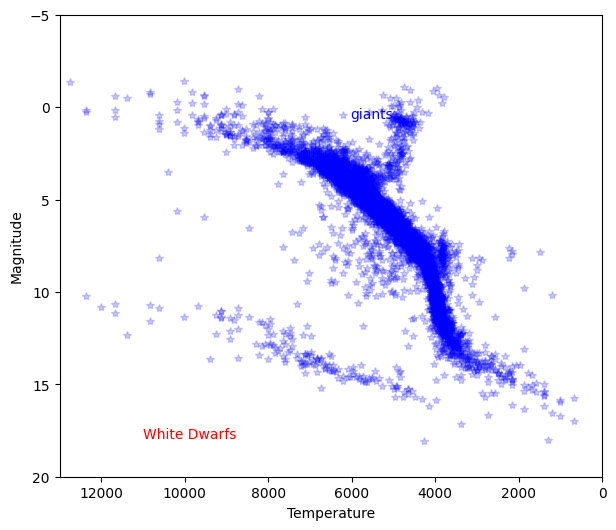

In [25]:
# open a figure
plt.figure(figsize=(7,6))

# use the plt.plot command to plot magnitude versus temperature
# plot the points using blue stars
# set alpha=.2 so you can see the points better
plt.plot(temp, mag, 'b*', alpha = 0.2)


# limit the x range uto (0,13000) using plt.xlim()
plt.xlim(0,13000)

# limit the y range uto (-5,20) using plt.ylim()
plt.ylim(-5,20)

# invert the x axis so that high lumonisities are on the left
ax = plt.gca()
ax.invert_xaxis()

# invert the y axis because magnitudes are weird in that
# brighter objects have lower magnitudes
ax.invert_yaxis()

# label your x and y axis
plt.xlabel('Temperature')
plt.ylabel('Magnitude')

# the sequence in the lower left is white dwarfs
white_dwarfs = "White Dwarfs"
white_dwarfs_position = (11000, max(mag))

# add a text label to show where the white dwarfs are
# using plt.text()  (use help(plt.text) to learn how to use it.)

plt.text(*white_dwarfs_position, white_dwarfs, ha = 'left', va = 'bottom', color = 'red', fontsize = 10)

# the sequence around T=5000 and magnitude=0 are giants
# add a label to show where the giants are using plt.text()

giants = "giants"
giants_position = (5000,0)
plt.text(*giants_position, giants, ha = 'right', va = 'top', color = 'blue', fontsize = 10)

plt.show()

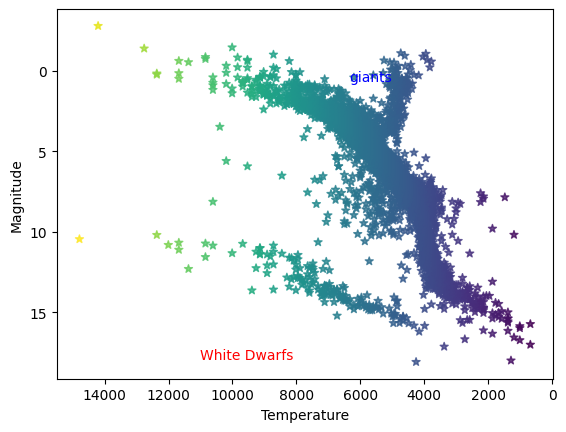

In [29]:
# plot again using the scatter plot command,
# and color code by the temperature of the star
# note that c=mycolor is how you add color to the scatter plot.

# invert the x-axis
ax = plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

# create labels for each axis
plt.xlabel('Temperature')
plt.ylabel('Magnitude')

# add white dwarfs
white_dwarfs = "White Dwarfs"
white_dwarfs_position = (11000, max(mag))
plt.text(*white_dwarfs_position, white_dwarfs, ha = 'left', va = 'bottom', color = 'red', fontsize = 10)

# add giants
giants = "giants"
giants_position = (5000,0)
plt.text(*giants_position, giants, ha = 'right', va = 'top', color = 'blue', fontsize = 10)

plt.scatter(temp, mag, c = temp, marker = '*', alpha = 0.8)

# Polar Plot

(5 points)

* Sometimes it's useful to visualize data using a polar plot.
* The following example is from https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html

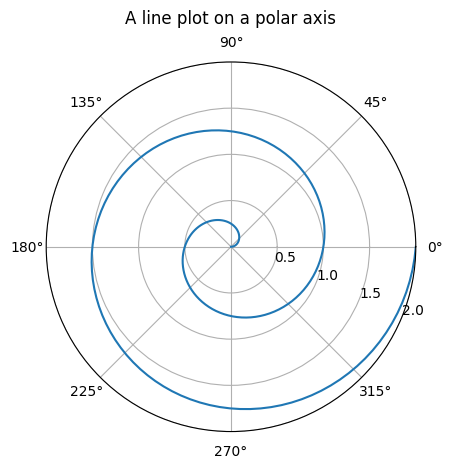

In [30]:
# create an array of radial values, r, that range from 0 to 2 with 200 steps
r = np.linspace(0,2,200)

# create an array of angles, theta, that is 2*np.pi*r
theta = 2 * np.pi * r

# the main plotting commands are in place below
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

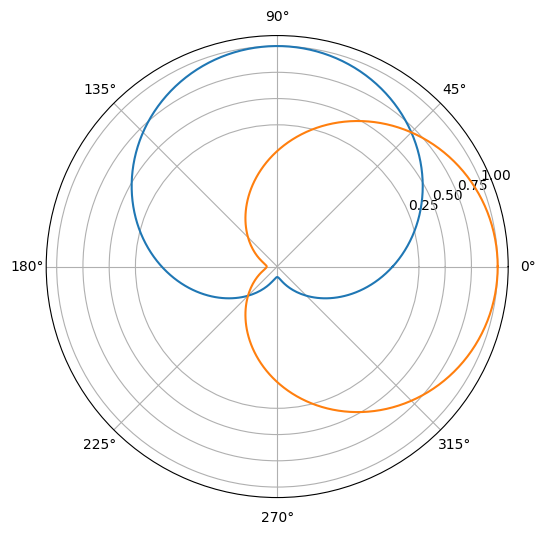

In [31]:
# make another polar plot showing sine and cosine of theta
# let theta range from zero to 2 pi, with 200 steps

theta = np.linspace(0,2*np.pi,200)
r = np.sin(theta)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(6,6))

ax.plot(theta, r)

# enter code to plot cos(theta)
r1 = np.cos(theta)

ax.plot(theta,r1)

ax.set_rticks([0.25, .5, .75,1])  # Less radial ticks
ax.grid(True)


# Displaying an image

(5 points)

We will use matplotlib's image module to display a jpg image.

In [32]:
# here we are downloading an image from the web using the linux tool wget
# the exclamation point tells us that this is a linux command
!wget http://www.envisionarchitects.com/files/9615/5017/1251/Siena_Obs_3.jpg

--2024-01-29 20:19:22--  http://www.envisionarchitects.com/files/9615/5017/1251/Siena_Obs_3.jpg
Resolving www.envisionarchitects.com (www.envisionarchitects.com)... 205.134.241.102
Connecting to www.envisionarchitects.com (www.envisionarchitects.com)|205.134.241.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271505 (265K) [image/jpeg]
Saving to: ‘Siena_Obs_3.jpg’

Siena_Obs_3.jpg     100%[===================>] 265.14K  1.09MB/s    in 0.2s    

2024-01-29 20:19:22 (1.09 MB/s) - ‘Siena_Obs_3.jpg’ saved [271505/271505]



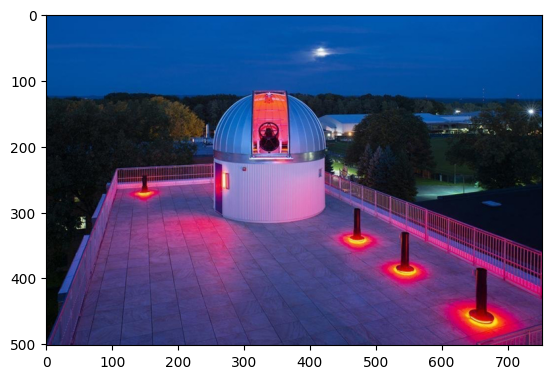

In [33]:
# we will use the image reader from matplotlib
# (there are other options - feel free to google)
# enter the image name below
myimage = image.imread("Siena_Obs_3.jpg")

plt.imshow(myimage)

### Display another image
Select another image to plot.  You can download the image from the web, or upload an image to your drive folder.  Or take a selfie!

To upload an image from your computer, type the following in a separate cell to start an interactive dialog where you can select your image.

```python
from google.colab import files
uploaded = files.upload()
```

Saving 2A16B32B-AFC2-4D1A-BFF5-35F67E187A2D.JPG to 2A16B32B-AFC2-4D1A-BFF5-35F67E187A2D (3).JPG


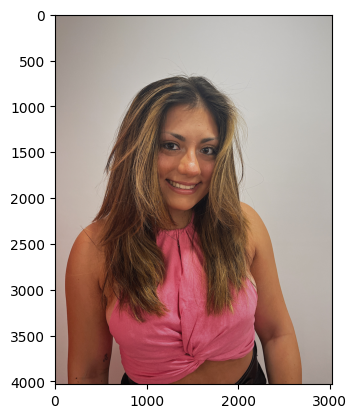

In [37]:
# code to plot your second image here
from google.colab import files
uploaded = files.upload()
myimage = image.imread("2A16B32B-AFC2-4D1A-BFF5-35F67E187A2D (2).JPG")
plt.imshow(myimage)

# Fitting a Straight Line to Data (Adapted from Newman Problem 3.8)

(5 points)

* download the datafile millikan.txt from http://www-personal.umich.edu/~mejn/cp/data/millikan.txt
* This is historic data from Rober Millikan that measured the photoelectric effect.
* Read in the data using np.loadtxt
  * the first colum is the frequence $\nu$ in hertz
  * the second column is the voltage $V$ in volts.
* Fit a line to the data using np.polyfit
```python
c = np.polyfit(x,y,1)
```

* Plot the best-fit line with the data. The following should be useful:
```python
xline = np.linspace(xmin,xmax,100)
yline = np.polyval(c,xline)
```

* The physical equation that determines the best-fit line is
$$V = \frac{h}{e} \nu - \phi $$
where
  * V is the voltage of the ejected electron
  * $\nu$ is the frequency of the light that shines on the metal
  * $\phi$ is the amount of energy needed to remove the electron from the metal, also known as the work function.
  * $h$ is Planck's constant
  * $e=1.6 \times 10^{-19}$ C is the charge of the electron in Coulombs.

* From your best fit slope and intercept, determine the values of the work function and Planck's constant.



--2024-01-29 21:35:46--  http://www-personal.umich.edu/~mejn/cp/data/millikan.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/millikan.txt [following]
--2024-01-29 21:35:46--  https://public.websites.umich.edu/~mejn/cp/data/millikan.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108 [text/plain]
Saving to: ‘millikan.txt.13’

millikan.txt.13     100%[===================>]     108  --.-KB/s    in 0s      

2024-01-29 21:35:46 (4.50 MB/s) - ‘millikan.txt.13’ saved [108/108]

The work function is:  -1.7312358039813522
Plank's constant is:  6.541163773628014e-34


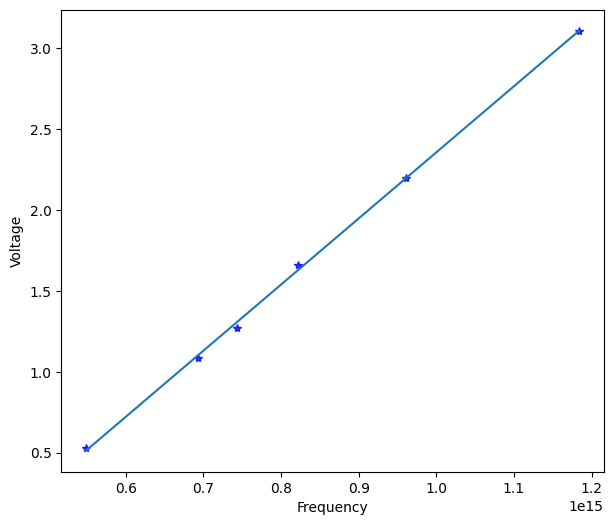

In [86]:
# enter your code here
# first create a series of comments to describe what your code will do
# then develop the code

# download the data file
!wget http://www-personal.umich.edu/~mejn/cp/data/millikan.txt

# read in the data
millikan_data = np.loadtxt('millikan.txt')

# set the first column equal to frequency in hertz
freq = millikan_data[:,0]

# set the second column equal to voltage in volts
volt = millikan_data[:,1]

# fit a line to the data
c = np.polyfit(freq,volt,1)

# plotting the best fit line
plt.figure(figsize=(7,6))

plt.xlabel("Frequency")
plt.ylabel("Voltage")

xline = np.linspace(min(freq),max(freq),100)
yline = np.polyval(c,xline)

plt.plot(freq, volt, 'b*', alpha = 0.8)
plt.plot(xline, yline)

slope, intercept = c

e = 1.6 * 10**-19
h = 6.6 * 10**-34

work_function = intercept
planks_constant = slope * e

print("The work function is: ", work_function)
print("Plank's constant is: ", planks_constant)


# Histogram of Data

(5 points)

* Histograms are useful for looking at the distribution of values for one particular quantity.
* In this problem, we will generate 100 random values that are drawn from a Gaussian distribution, and we will then plot the values in a histogram.
* We will then calculate the average and standard deviation, and show these values on the graph.

* Read through the output from help - what do you expect the mean and standard deviation to be?

In [75]:
# explore the function using help
# help(np.random.normal)

average value = -0.06
the STD = 1.01


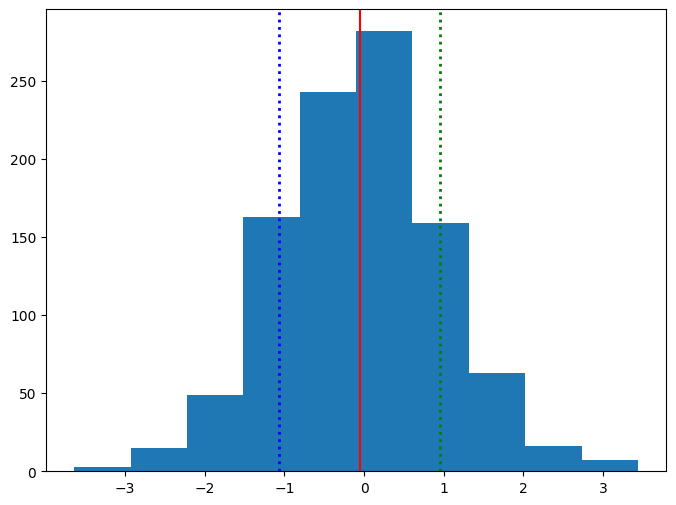

In [74]:
plt.figure(figsize=(8,6))

gauss_values = np.random.normal(size=1000)
plt.hist(gauss_values)
print("average value = {:.2f}".format(np.mean(gauss_values)))
print("the STD = {:.2f}".format(np.std(gauss_values)))

average_value = np.mean(gauss_values)
std_deviation = np.std(gauss_values)

# add code to plot a vertical line at the average
# use plt.axvline()

plt.axvline(average_value, color = 'red')

# add code to plot dotted vertical lines at
# average + std
# average - std

plt.axvline(average_value + std_deviation, color='green', linestyle='dotted', linewidth=2, label='Average + Std')
plt.axvline(average_value - std_deviation, color='blue', linestyle='dotted', linewidth=2, label='Average - Std')

# once your figure is set, try increasing the sample size
# what happens to the mean and std as the sample size increases?

# the mean and std get closer together (towards 0) as the sample size increases

# Multipanel Plot

(5 points)
* create a plot with 4 panel - two columns and two rows.  You can call the top plot using plt.subplot(nrow,ncol,nplot), or
```python
plt.subplot(2,2,1)
```
* plot $sin(\theta)$ vs. $\theta$ in the first panel.
* plot $cos(\theta)$ vs. $\theta$ in the second panel.
* plot $tan(\theta)$ vs. $\theta$ in the third panel.
* plot all three functions together in the fourth panel.
* use np.cos, np.sin, np.tan

Text(0.5, 1.0, 'Subplot 4 - Sin(theta), Cos(theta), & Tan(theta)')

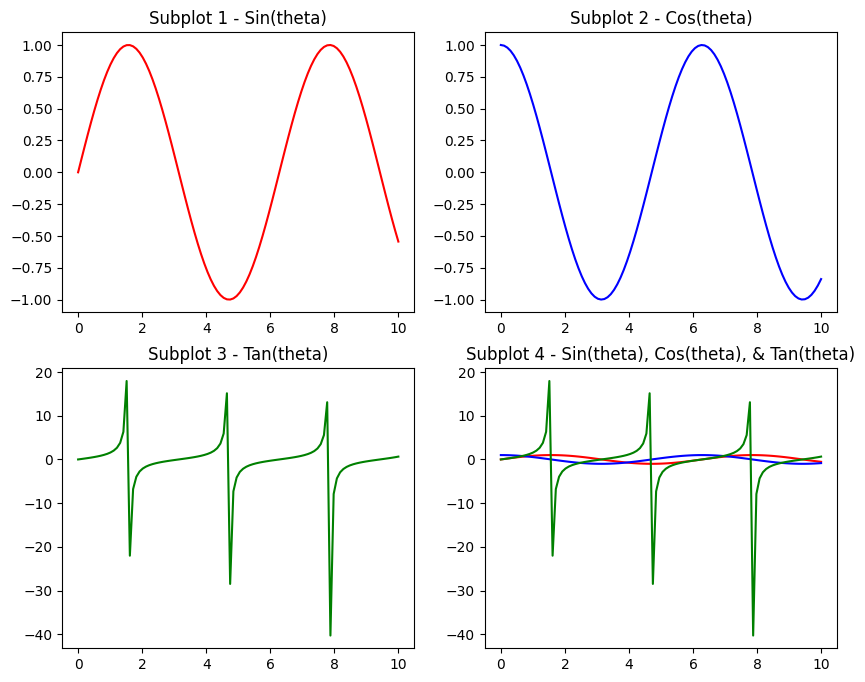

In [69]:
plt.figure(figsize=(10,8))

theta = np.linspace(0, 10, 100)
sin = np.sin(theta)
cos = np.cos(theta)
tan = np.tan(theta)

plt.subplot(2,2,1)

plt.plot(theta, sin, color='red')
plt.title('Subplot 1 - Sin(theta)')

plt.subplot(2,2,2)

plt.plot(theta, cos, color = 'blue')
plt.title('Subplot 2 - Cos(theta)')

plt.subplot(2,2,3)

plt.plot(theta, tan, color = 'green')
plt.title('Subplot 3 - Tan(theta)')

plt.subplot(2,2,4)

plt.plot(theta, sin, label='sin(theta)', color='red')
plt.plot(theta, cos, label='cos(theta)', color = 'blue')
plt.plot(theta, tan, label='tan(theta)', color = 'green')
plt.title('Subplot 4 - Sin(theta), Cos(theta), & Tan(theta)')

# 3D Plots

(5 points)

* Below is an example of a 3D plot, just for future reference.
* You don't need to add anything except a title that indicates some physical situation where this type of motion could arise.
*NOTE: if you run this cell on your own installation of notebook, you will be able to move the plot around to view it from different angles.

Text(0.5, 0.92, 'Circular Motion of Sine & Cosine in 3D')

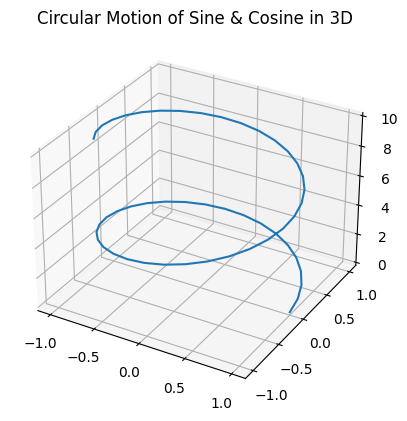

In [72]:
fig = plt.figure()

# keeping the projection = 3d
# ctreates the 3d plot
ax = plt.axes(projection = '3d')
time = np.linspace(0,10)
x = np.cos(time)
y = np.sin(time)
plt.plot(x,y,time)

# add your title here!
plt.title('Circular Motion of Sine & Cosine in 3D')

# One final plot of your choice

(5 points)

* Check out the Examples and Tutorials on the [matplotlib website](https://matplotlib.org/stable/index.html).
* Select a plot that you like and replicate the code here.

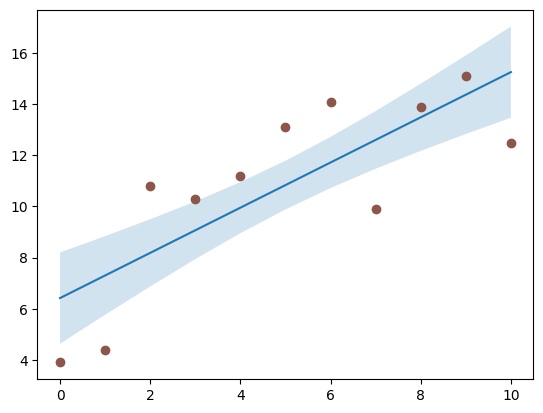

In [76]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

# Summarizing What Your Learning and Saving Your Work

* Save your notebook to github.
* On your wiki, create a summary page of the important points covered in this lab.
* This should be similar to the reference cheat-sheets, rather than a paragraph summary. So include code snippets and explanatory text.
